In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import BatFNs
%matplotlib inline

Coefficients: 
 [  0.00000000e+00   3.99000652e-04   8.09465504e-04  -2.54979706e-04
  -1.06648562e-06  -8.67078503e-06  -4.45118349e-06  -1.39564010e-05
  -6.57982192e-06   2.42634909e-06]
Mean squared error: 0.00
Variance score: 0.67
Coefficients: 
 [  0.00000000e+00   3.99000652e-04   8.09465504e-04  -2.54979706e-04
  -1.06648562e-06  -8.67078503e-06  -4.45118349e-06  -1.39564010e-05
  -6.57982192e-06   2.42634909e-06]
Mean squared error: 0.00
Variance score: 0.96


In [17]:
df = pd.read_csv('../data/SM_forecast_2016.csv')
df['temperature'] = (df['temperature'] - 32)*(5/9)
DailyTemp = []
for ii in range(365):
    DailyTemp.append(df.loc[ii*24:ii*24+24,'temperature'].mean(axis=0))

In [42]:
df = pd.read_csv('../data/Salem_forecast_2016.csv')
df['temperature'] = (df['temperature'] - 32)*(5/9)
DailyTemp2 = []
for ii in range(365):
    DailyTemp2.append(df.loc[ii*24:ii*24+24,'temperature'].mean(axis=0))

In [48]:
df = pd.read_csv('../data/Salem_forecast_2016.csv')
df['temperature'] = (df['temperature'] - 32)*(5/9)
DailyTemp3 = []
for ii in range(365):
    DailyTemp3.append(df.loc[ii*24:ii*24+24,'temperature'].mean(axis=0))

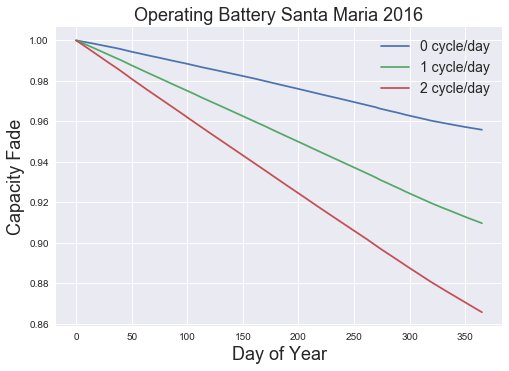

In [44]:
Cap = []
Cap.append(1)
soc = 50
cycles = 0
soc_low = 0
soc_high = 80
rate = 1
for ii in range(365):    
    Cap.append(BatFNs.bat_day(soc,DailyTemp[ii],cycles,soc_low,soc_high,rate)*Cap[ii])
    
Cap2 = []
Cap2.append(1)
soc = 50
cycles = 1
soc_low = 0
soc_high = 80
rate = 1
for ii in range(365):    
    Cap2.append(BatFNs.bat_day(soc,DailyTemp[ii],cycles,soc_low,soc_high,rate)*Cap2[ii])
    
Cap3 = []
Cap3.append(1)
soc = 50
cycles = 2
soc_low = 0
soc_high = 80
rate = 1
for ii in range(365):    
    Cap3.append(BatFNs.bat_day(soc,DailyTemp[ii],cycles,soc_low,soc_high,rate)*Cap3[ii])
    
plt.style.use('seaborn')
plt.plot(range(366),Cap,range(366),Cap2,range(366),Cap3)
plt.xlabel('Day of Year', fontsize=18)
plt.ylabel('Capacity Fade',fontsize=18)
plt.title('Operating Battery Santa Maria 2016',fontsize=18)
plt.legend(('0 cycle/day','1 cycle/day','2 cycle/day'),fontsize=14)

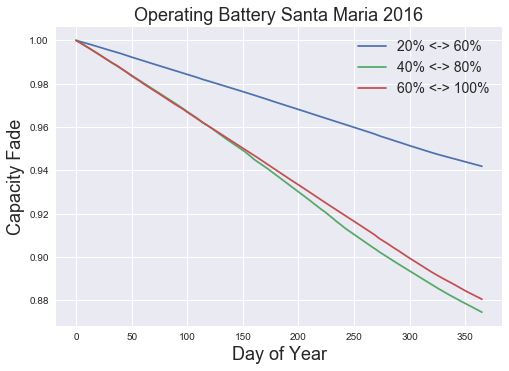

In [43]:
Cap = []
Cap.append(1)
soc = 40
cycles = 1
soc_low = 20
soc_high = 60
rate = 1
for ii in range(365):    
    Cap.append(BatFNs.bat_day(soc,DailyTemp[ii],cycles,soc_low,soc_high,rate)*Cap[ii])
    
Cap2 = []
Cap2.append(1)
soc = 60
cycles = 1
soc_low = 40
soc_high = 80
rate = 1
for ii in range(365):    
    Cap2.append(BatFNs.bat_day(soc,DailyTemp[ii],cycles,soc_low,soc_high,rate)*Cap2[ii])
    
Cap3 = []
Cap3.append(1)
soc = 80
cycles = 1
soc_low = 60
soc_high = 100
rate = 1
for ii in range(365):    
    Cap3.append(BatFNs.bat_day(soc,DailyTemp[ii],cycles,soc_low,soc_high,rate)*Cap3[ii])
    
plt.style.use('seaborn')
plt.plot(range(366),Cap,range(366),Cap2,range(366),Cap3)
plt.xlabel('Day of Year', fontsize=18)
plt.ylabel('Capacity Fade',fontsize=18)
plt.title('Operating Battery Santa Maria 2016',fontsize=18)
plt.legend(('20% <-> 60%','40% <-> 80%','60% <-> 100%'),fontsize=14)

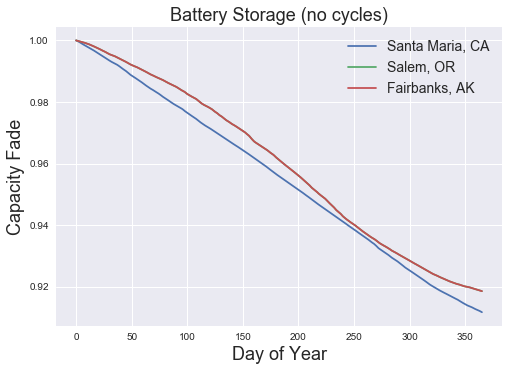

In [54]:
Cap = []
Cap.append(1)
soc = 100
cycles = 0
soc_low = 0
soc_high = 100
rate = 1
for ii in range(365):    
    Cap.append(BatFNs.bat_day(soc,DailyTemp[ii],cycles,soc_low,soc_high,rate)*Cap[ii])
    
Cap2 = []
Cap2.append(1)
soc = 100
cycles = 0
soc_low = 0
soc_high = 100
rate = 1
for ii in range(365):    
    Cap2.append(BatFNs.bat_day(soc,DailyTemp2[ii],cycles,soc_low,soc_high,rate)*Cap2[ii])
    
Cap3 = []
Cap3.append(1)
soc = 100
cycles = 0
soc_low = 0
soc_high = 100
rate = 1
for ii in range(365):    
    Cap3.append(BatFNs.bat_day(soc,DailyTemp3[ii],cycles,soc_low,soc_high,rate)*Cap3[ii])
    
plt.style.use('seaborn')
plt.plot(range(366),Cap,range(366),Cap2,range(366),Cap3)
plt.xlabel('Day of Year', fontsize=18)
plt.ylabel('Capacity Fade',fontsize=18)
plt.title('Battery Storage (no cycles)',fontsize=18)
plt.legend(('Santa Maria, CA','Salem, OR','Fairbanks, AK'),fontsize=14)

In [12]:
Cap = []
Cap.append(1)
Shelf = []
Shelf.append(1)
soc = 50
cycle = 0
cycles = 1
soc_low = 0
soc_high = 80
rate = 1
for ii in range(365):
    cycle = cycle + cycles
    (DegCycle, DegStore) = BatFNs.bat_day2(soc,DailyTemp[ii],cycle,soc_low,soc_high,rate)
    Shelf.append(DegStore*Shelf[ii])
    Cap.append(DegStore*Shelf[ii]*DegCycle)

In [16]:
DailyTemp[ii]

IndexError: list index out of range

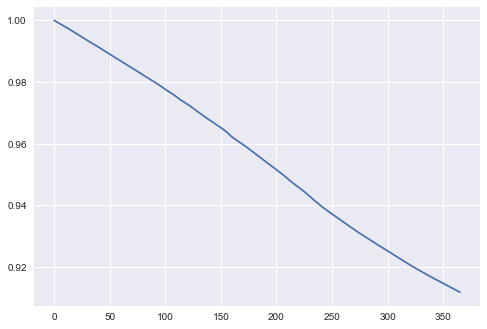

In [16]:
plt.style.use('seaborn')
plt.plot(Cap)

In [13]:
df.loc[ii*24:ii*24+24,'temperature'].mean(axis=0)

7.783111111111111